<a href="https://colab.research.google.com/github/khusheedhanuka/machine_learning/blob/main/K_Mediod_Clsustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

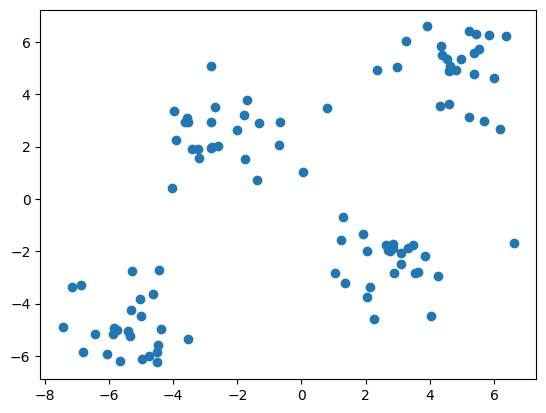

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

plt.scatter(X[:,0],X[:,1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

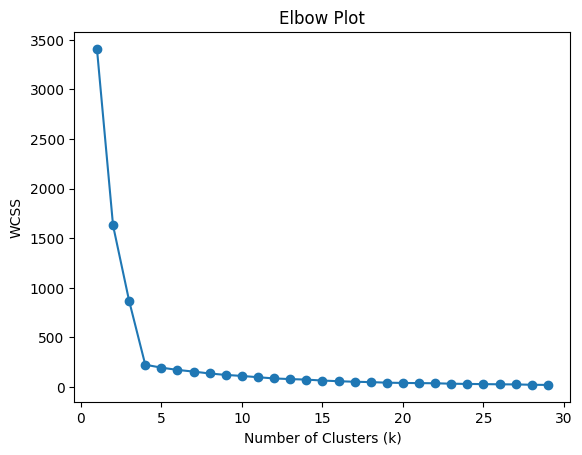

In [ ]:

from sklearn.cluster import KMeans


k_values = range(1, 30)


wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

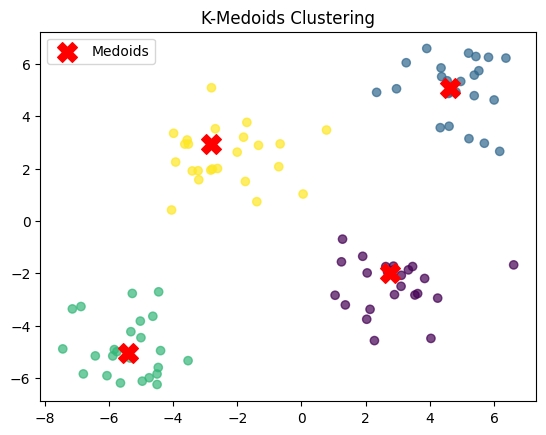

[[ 2.74143963 -2.00257435]
 [ 4.61848352  5.06648901]
 [-5.41675785 -5.05626683]
 [-2.82358007  2.92382471]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def k_medoids(data, k, max_iterations=300):
    num_samples, num_features = data.shape


    medoids_idx = np.random.choice(num_samples, k, replace=False)
    medoids = data[medoids_idx, :]

    for _ in range(max_iterations):

        labels = np.argmin(np.array([np.sum(np.abs(data - medoid), axis=1) for medoid in medoids]), axis=0)


        for cluster_idx in range(k):
            cluster_points = data[labels == cluster_idx]
            cluster_cost = np.sum([np.sum(np.abs(point - medoids[cluster_idx, :])) for point in cluster_points])

            for non_medoid_idx in range(len(cluster_points)):
                new_medoid = cluster_points[non_medoid_idx, :]
                new_cost = np.sum([np.sum(np.abs(point - new_medoid)) for point in cluster_points])

                if new_cost < cluster_cost:
                    medoids[cluster_idx, :] = new_medoid
                    cluster_cost = new_cost

    return labels, medoids

labels, medoids = k_medoids(X, k=4)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

print(medoids)


In [ ]:
medoids


array([[ 1.36568152, -3.20742089],
       [-0.70740715,  2.07098668],
       [-2.82358007,  2.92382471],
       [ 4.61848352,  5.06648901]])